# Cleaning and visualizing your data

No dataset is perfect. Much as with human sources, your data won't have the complete story. It will be able to point you in a new direction or supply valuable context or contain a surprising insight. And it will be representative of the flaws in the process and the people that created it.

How to account for all that? Cleaning. No dataset is usable until it's gone through a process by which you know it's as clean as you can get it -- and the ways in which it's still imperfect. Communicating that to editors and audience is important, too.

Some things to look for when you're diving into at a dataset:

- Are there blank rows at the beginning or end of the file?
- What does each column header mean? What are the values you'd expect to find in that column?
- Are all the columns importing with the proper column type? Strings, datetimes, floats, integers.
- Are there `NaN` (or `null` or `''` or `None`) values in any of your columns? Are there any columns with mostly `NaN` values?
- Is there duplicate data?
- Are there fields that appear to have been entered inconsistently? Pay attention to capitalization and punctuation!
- Do you see any funky special characters?

Much of the time spent working with data will be with a scouring pad, a mop, and sometimes a toothbrush.

Occasionally you get to use a flamethrower. Those are both good and bad days.

Once you have your data, the first trick is usually figuring out which tool you need next.


In [1]:
import pandas as pd

In [2]:
facilities = pd.read_csv('data/facilities.csv')

In [3]:
complaints = pd.read_excel("data/complaints.xlsx")

In [4]:
facilities.head(25)

,facid,fac_type,capacity,fac_name,fac_address,city_state_zip,Unnamed: 6,owner,operator
0,385008,NF,96.0,Presbyterian Community Care Center,1085 N Oregon St,"Ontario, OR 97914",NaN,"Presbyterian Nursing Home, Inc.","Presbyterian Nursing Home, Inc."
1,385010,NF,159.0,Laurelhurst Village Rehabilitation Center,3060 SE Stark St,"Portland, OR 97214",NaN,"Laurelhurst Operations, LLC","Laurelhurst Operations, LLC"
2,385015,NF,128.0,Regency Gresham Nursing & Rehabilitation Center,5905 SE Powell Valley Rd,"Gresham, OR 97080",NaN,Regency Gresham Nursing & Rehabilitation Cente...,"Regency Pacific Management, LLC"
3,385018,NF,98.0,Providence Benedictine Nursing Center,540 South Main St,"Mt. Angel, OR 97362",NaN,Providence Health & Services - Oregon,Providence Health & Services - Oregon
4,385024,NF,91.0,Avamere Health Services of Rogue Valley,625 Stevens St,"Medford, OR 97504",NaN,"Medford Operations, LLC","Medford Operations, LLC"
5,385031,NF,127.0,Avamere Crestview of Portland,6530 SW 30th Avenue,"Portland, OR 97239",NaN,"Crestview Operations, LLC","Crestview Operations, LLC"
6,385039,NF,84.0,Baycrest Health Center,3959 Sheridan Ave,"North Bend, OR 97459",NaN,"Bay Area Properties, LLC","Radiant Senior Living, Inc."
7,385044,NF,83.0,Prestige Care and Rehabilitation of Menlo Park,745 NE 122nd Ave,"Portland, OR 97230",NaN,Care Center (Menlo Park) Inc.,"Prestige Care, Inc."
8,385045,NF,99.0,Porthaven Healthcare Center,5330 NE Prescott,"Portland, OR 97218",NaN,Care Center (Porthaven) Inc.,"Prestige Care, Inc."
9,385046,NF,83.0,Hillside Heights Rehabilitation Center,1201 McLean Blvd,"Eugene, OR 97405",NaN,Hillside Heights L.L.C.,"Pinnacle Healthcare Management, Inc."


One of the first things that leaps out is we have an `Unnamed: 6` column that seems to contain ... nothing. That's what it looks like, so we should check and make sure.

In [5]:
facilities["Unnamed: 6"].unique()

array([nan])

Perfect. There's nothing in it but nothin'. Let's get rid of it.

In [6]:
facilities = facilities.drop("Unnamed: 6", axis=1)

Now let's look again and make sure that did what we think it did.

In [7]:
facilities.head(25)

,facid,fac_type,capacity,fac_name,fac_address,city_state_zip,owner,operator
0,385008,NF,96.0,Presbyterian Community Care Center,1085 N Oregon St,"Ontario, OR 97914","Presbyterian Nursing Home, Inc.","Presbyterian Nursing Home, Inc."
1,385010,NF,159.0,Laurelhurst Village Rehabilitation Center,3060 SE Stark St,"Portland, OR 97214","Laurelhurst Operations, LLC","Laurelhurst Operations, LLC"
2,385015,NF,128.0,Regency Gresham Nursing & Rehabilitation Center,5905 SE Powell Valley Rd,"Gresham, OR 97080",Regency Gresham Nursing & Rehabilitation Cente...,"Regency Pacific Management, LLC"
3,385018,NF,98.0,Providence Benedictine Nursing Center,540 South Main St,"Mt. Angel, OR 97362",Providence Health & Services - Oregon,Providence Health & Services - Oregon
4,385024,NF,91.0,Avamere Health Services of Rogue Valley,625 Stevens St,"Medford, OR 97504","Medford Operations, LLC","Medford Operations, LLC"
5,385031,NF,127.0,Avamere Crestview of Portland,6530 SW 30th Avenue,"Portland, OR 97239","Crestview Operations, LLC","Crestview Operations, LLC"
6,385039,NF,84.0,Baycrest Health Center,3959 Sheridan Ave,"North Bend, OR 97459","Bay Area Properties, LLC","Radiant Senior Living, Inc."
7,385044,NF,83.0,Prestige Care and Rehabilitation of Menlo Park,745 NE 122nd Ave,"Portland, OR 97230",Care Center (Menlo Park) Inc.,"Prestige Care, Inc."
8,385045,NF,99.0,Porthaven Healthcare Center,5330 NE Prescott,"Portland, OR 97218",Care Center (Porthaven) Inc.,"Prestige Care, Inc."
9,385046,NF,83.0,Hillside Heights Rehabilitation Center,1201 McLean Blvd,"Eugene, OR 97405",Hillside Heights L.L.C.,"Pinnacle Healthcare Management, Inc."


Lovely. Onward.

Next, let's take a look at this `facid` column. It appears to be a unique id, which is always helpful to have when dealing with a dataset. So let's see if it really is unique.

In [8]:
facilities["facid"].value_counts().head()

50M098    2
50M174    1
70M008    1
50M019    1
385272    1
Name: facid, dtype: int64

Hm. This is worth looking at more closely. What `dtype: int64` is telling us is that `pandas` wants to treat this as a column of integers -- which it clearly isn't. There are letters mixed in and we have no reason to try to do math on these or anything.

Let's make sure these come in as strings instead.

In [9]:
facilities["facid"] = facilities["facid"].astype(str)
facilities["facid"].dtype

dtype('O')

Cool. `O` is for object, which in `pandas` is what we're looking for.

Now take another look at the output from `value_counts()`. We want to use these as unique IDs but it looks like there's a value in that column twice. We should take a closer look at that.

We've done a littler bit of filtering, so let's try that again here.

In [10]:
facilities[facilities["facid"]=="50M098"]

,facid,fac_type,capacity,fac_name,fac_address,city_state_zip,owner,operator
165,50M098,RCF,NaN,Aaren Brooke Place,995 N Oregon St,"Ontario, OR 97914","Ashley Manor, L.L.C.","Ashley Manor, L.L.C."
166,50M098,RCF,14.0,Aaren Brooke Place,995 N Oregon St,"Ontario, OR 97914","Ashley Manor, L.L.C.","Ashley Manor, L.L.C."


Yep, we've got a duplicate. One seems to have more complete data, so that's the one we want to keep. We'll drop the other one.

We're going to drop the row we don't want by selecting its index number, 165, and then resetting the index so that it's numbered sequentially again. For safety, we're also going to write the result to a new variable so that, if we mess up and have to rerun this cell, we won't run the risk of dropping any other row that gets numbered 165.

Speaking of messing up: In your Pandas adventures, there's probably going to be a point where you've got a lot of variables saved and things just aren't doing what you think they should be doing. There's an easy way to start fresh in those cases — just select Kernel>Restart & Clear Output to restart so you can run everything from the beginning, or select Kernel>Restart & Run All to clear all variables and rerun your whole notebook.

In [11]:
facilities_clean = facilities.drop([165]).reset_index(drop=True)

Now let's filter again to make sure we no longer have a duplicate.

In [12]:
facilities_clean[facilities_clean["facid"]=="50M098"]

,facid,fac_type,capacity,fac_name,fac_address,city_state_zip,owner,operator
165,50M098,RCF,14.0,Aaren Brooke Place,995 N Oregon St,"Ontario, OR 97914","Ashley Manor, L.L.C.","Ashley Manor, L.L.C."


Fan-bloody-tastic. Now that we can be pretty confident we don't have duplicates, we can turn out attention to that combined `city_state_zip` column. It's _almost_ helpful. Surely we'd prefer to look at these facilities by city or zip code separately, so we're going to want them in separate columns.

The last five characters of each `city_state_zip` entry seem to be our zip codes, so we'll `slice` those off on their own.

In [13]:
facilities_clean["zip"] = facilities_clean["city_state_zip"].str[-5:]

And now we can look again to make sure we did that correctly and none of the values are wonky.

In [14]:
facilities_clean["zip"].unique()

array(['97914', '97214', '97080', '97362', '97504', '97239', '97459',
       '97230', '97218', '97405', '97058', '97202', '97526', '97030',
       '97330', '97477', '97031', '97321', '97219', '97630', '97071',
       '97045', '97224', '97220', '97601', '97701', '97215', '97439',
       '97470', '97103', '97221', '97038', '97471', '97424', '97116',
       '97401', '97420', '97862', '97365', '97467', '97415', '97007',
       '97403', '97355', '97128', '97132', '97741', '97426', '97233',
       '97236', '97351', '97302', '97005', '97520', '97222', '97801',
       '97027', '97322', '97338', '97211', '97850', '97216', '97124',
       '97051', '97301', '97448', '97756', '97303', '97317', '97086',
       '97385', '97386', '97147', '97123', '97458', '97232', '97013',
       '97754', '97381', '97838', '97266', '97034', '97070', '97035',
       '97918', '97378', '97213', '97225', '97068', '97056', '97702',
       '97869', '97060', '97062', '97206', '97603', '97223', '97203',
       '97205', '974

How does that look to y'all? Anything stand out?

Format-wise, this actually worked out pretty well — looks like there weren't any items in that column entered wrong, so all of these are actually zip codes. As an added bonus, it's always best to read zip codes in as string or categorical data, since integer or float formats will drop the leading zeros. And that is its own hellscape.

Speaking of leading zeros, though, that 05400 zipcode doesn't quite look right. From the context in the rest of the data, we can be pretty sure that's not an Oregon zip code.

Let's take a closer look with a quick filter.

In [15]:
facilities_clean[facilities_clean["zip"]=='05400']

,facid,fac_type,capacity,fac_name,fac_address,city_state_zip,owner,operator,zip
642,0O0O0O,NaN,57.0,Fake Facility,1234 Fake St,"Nowheresville, NY 05400",Fake Company,"Not a Company, LLC",05400


AHA! Someone was messing with our data. (Full disclosure: It was me.)

If it was a little less fake-looking, we might double-check the `facid` against the complaints dataset to make sure it doesn't match any entries there.

So now we know that we don't need this as we continue through the cleaning and analysis, we can kill it.

In [16]:
facilities_clean = facilities_clean[facilities_clean["zip"] != "05400"]

And so let's look again at those zip codes.

In [17]:
facilities_clean["zip"].unique()

array(['97914', '97214', '97080', '97362', '97504', '97239', '97459',
       '97230', '97218', '97405', '97058', '97202', '97526', '97030',
       '97330', '97477', '97031', '97321', '97219', '97630', '97071',
       '97045', '97224', '97220', '97601', '97701', '97215', '97439',
       '97470', '97103', '97221', '97038', '97471', '97424', '97116',
       '97401', '97420', '97862', '97365', '97467', '97415', '97007',
       '97403', '97355', '97128', '97132', '97741', '97426', '97233',
       '97236', '97351', '97302', '97005', '97520', '97222', '97801',
       '97027', '97322', '97338', '97211', '97850', '97216', '97124',
       '97051', '97301', '97448', '97756', '97303', '97317', '97086',
       '97385', '97386', '97147', '97123', '97458', '97232', '97013',
       '97754', '97381', '97838', '97266', '97034', '97070', '97035',
       '97918', '97378', '97213', '97225', '97068', '97056', '97702',
       '97869', '97060', '97062', '97206', '97603', '97223', '97203',
       '97205', '974

A note on zip codes: We got a little lucky having to separate out the zip codes from an existing string. That's not always the case, and `pandas` often will see them as integers -- if our dataset had had a separate column of zip codes, there's a 99 percent chance they would have imported as numbers. Especially in New England, where most zip codes begin with a zero, we end up with four-digit zip codes in our data -- which, y'know ... it's not good. [Here's how you can import a column of zip codes as strings]('http://data-tutorials.com/zip-codes-in-pandas.html').

So! On to city names.

Our city names go up to the first comma, so we can use that to split the string into what comes before and what comes after that comma. Then we can grab the first item and that should be our city name.

In [18]:
facilities_clean["city"] = facilities_clean["city_state_zip"].str.split(",").str[0]

So let's have a look.

In [19]:
facilities_clean["city"].unique()

array(['Ontario', 'Portland', 'Gresham', 'Mt. Angel', 'Medford',
       'North Bend', 'Eugene', 'The Dalles', 'Grants Pass', 'Corvallis',
       'Springfield', 'Hood River', 'Albany', 'Lakeview', 'Woodburn',
       'Oregon City', 'Tigard', 'Klamath Falls', 'Bend', 'Florence',
       'Roseburg', 'Astoria', 'Molalla', 'Cottage Grove', 'Forest Grove',
       'Coos Bay', 'Milton-Freewater', 'Newport', 'Reedsport',
       'Brookings', 'Beaverton', 'Lebanon', 'McMinnville', 'Newberg',
       'Madras', 'Creswell', 'Independence', 'Salem', 'Ashland',
       'Milwaukie', 'Pendleton', 'Gladstone', 'Dallas', 'La Grande',
       'Hillsboro', 'St Helens', 'Junction City', 'Redmond', 'Keizer',
       'Sublimity', 'Sweet Home', 'Wheeler', 'Myrtle Point', 'Canby',
       'Prineville', 'Silverton', 'Hermiston', 'Lake Oswego',
       'Wilsonville', 'Vale', 'Sheridan', 'West Linn', 'Scappoose',
       'Prairie City', 'Wood Village', 'Tualatin', 'Troutdale', 'Bandon',
       'Fossil', 'Baker City', 'Canyo

Those look pretty good. We can move on to looking at the `owner` and `operator` fields. Those will be easier to look at quickly if we use a built-in Python function to sort them.

In [20]:
sorted(facilities_clean["operator"].unique())

['A Touch of Grace, LLC',
 'AIM Senior Management, LLC',
 'ASPEN COURT AID OPCO, LLC',
 'ASTOR AID OPCO, LLC',
 'AWBREY AID OPCO, LLC',
 'Adara Oaks Manor, LLC',
 'Advocate Care, LLC',
 'Ageia Health Services, LLC',
 'Aidan Health Services, Inc.',
 'Aidan Senior Living at Reedsport, Inc',
 'Angeline Senior Living, LLC',
 'Artegan at Hawthorne Gardens, LLC',
 'Asa Care, Inc.',
 'Ashland View Manor, Inc.',
 'Ashley Manor LLC',
 'Ashley Manor, L.L.C.',
 'Aspen Foundation',
 'Aspen Foundation III',
 'Autumn Garden Home RCF, LLC',
 'Avamere Bethany Operations, LLC',
 'Avamere Lake Oswego Operations Investors, LLC',
 'Avamere Sandy Operations, LLC',
 'Avamere Stafford Operations, LLC',
 'Avamere-Bethany Operations, LLC',
 'Avamere-Hillsboro Operations, LLC',
 'Avamere-Sandy Operations, LLC',
 'Avamere-Sherwood Operations, LLC',
 'Avamere-St. Helens Operations, LLC ',
 'Avamere-St.Helens Operations, LLC',
 'Avant Senior Housing Managers & Consultants, LLC',
 'BME Enterprises, Inc.',
 'BPM Sen

Right off the bat, we can see there are some duplicates. A change in capitalization, a change in punctuation, a change in spacing -- any of these can cause this. So to the degree that we can, we should try to standardize the names here.

First, let's get a sense of the size of the universe of names we're looking at.

In [21]:
print(len(facilities_clean["operator"].unique()))
print(len(facilities_clean["owner"].unique()))

283
437


That's about 700 things we'd have to check manually to resolve differences -- more than enough to know code might be able to help us narrow down this normalization problem.

What we need are some rules we can apply to all of these to try to eliminate the sublte differences. We can make everything uppercase, for example, and we can remove all the commas and periods.

So let's do that.

In [22]:
facilities_clean["operator"] = facilities_clean["operator"].str.upper().str.replace(r"[,.]","")
facilities_clean["owner"] = facilities_clean["owner"].str.upper().str.replace(r"[,.]","")

Now let's look at that `operator` column again.

In [23]:
sorted(facilities_clean["operator"].unique())

['A TOUCH OF GRACE LLC',
 'ADARA OAKS MANOR LLC',
 'ADVOCATE CARE LLC',
 'AGEIA HEALTH SERVICES LLC',
 'AIDAN HEALTH SERVICES INC',
 'AIDAN SENIOR LIVING AT REEDSPORT INC',
 'AIM SENIOR MANAGEMENT LLC',
 'ANGELINE SENIOR LIVING LLC',
 'ARTEGAN AT HAWTHORNE GARDENS LLC',
 'ASA CARE INC',
 'ASHLAND VIEW MANOR INC',
 'ASHLEY MANOR LLC',
 'ASPEN COURT AID OPCO LLC',
 'ASPEN FOUNDATION',
 'ASPEN FOUNDATION III',
 'ASTOR AID OPCO LLC',
 'AUTUMN GARDEN HOME RCF LLC',
 'AVAMERE BETHANY OPERATIONS LLC',
 'AVAMERE LAKE OSWEGO OPERATIONS INVESTORS LLC',
 'AVAMERE SANDY OPERATIONS LLC',
 'AVAMERE STAFFORD OPERATIONS LLC',
 'AVAMERE-BETHANY OPERATIONS LLC',
 'AVAMERE-HILLSBORO OPERATIONS LLC',
 'AVAMERE-SANDY OPERATIONS LLC',
 'AVAMERE-SHERWOOD OPERATIONS LLC',
 'AVAMERE-ST HELENS OPERATIONS LLC ',
 'AVAMERE-STHELENS OPERATIONS LLC',
 'AVANT SENIOR HOUSING MANAGERS & CONSULTANTS LLC',
 'AWBREY AID OPCO LLC',
 'BEAVERTON REHAB & SPECIALTY CARE LLC',
 'BEE HIVE HOMES OF BAKER CITY',
 'BENECIA SENIOR 

Yo. That is an improvement.

We can take another look at the size of our universe and get a sense of how we've narrowed things down.

In [24]:
print(len(facilities_clean["operator"].unique()))
print(len(facilities_clean["owner"].unique()))

276
433


Better than having to do that by hand, certainly.

OK. So now let's reintroduce our complaints data.

In [25]:
complaints["incident_year"] = complaints["incident_date"].dt.year
complaints["incident_year"].unique()

array([2010, 2012, 2011, 2013, 2015, 2014, 2016, 2009, 2001, 2105, 2003])

One of those is not like the other. Quite often, because data is as messy as humans are, you'll see dates unrealistically in the past or the future. Sometimes it's a result of how the system that stores the data handles empty values or poorly formatted historical data. And sometimes it's just, like, because.

In this case, let's briefly peer into the future.

In [26]:
complaints[complaints["incident_year"]==2105]

,complaint_id,facility_id,facility_type,incident_date,notes,severity,fine,Facility Invest Results Abuse,Facility Invest Results Rule,Type Of Abuse,incident_year
4284,CO15241,516637,AFH,2105-12-02,Voluntarily reduced capacity - Condition not n...,4.0,NaN,NaN,NaN,NaN,2105


It's one record, and this is a quick analysis, which means this is a reasonable case to make a note that we tossed this record out and move on. 

In [27]:
complaints = complaints[complaints["incident_year"] != 2105]
# always, always check the output again to make sure it did the thing you wanted
complaints["incident_year"].unique()

array([2010, 2012, 2011, 2013, 2015, 2014, 2016, 2009, 2001, 2003])

Feels like this is in pretty good shape. We've looked at a lot of the initial things to check, so a little analysis and a chart or two seem like a good thing to work toward from here.

And thus we return to our good friend `groupby()` for some summaries.

In [28]:
# complaints by year
complaints_year = complaints[["incident_year","complaint_id"]].groupby(["incident_year"]).count()
complaints_year.index.names=["year"]
complaints_year

,complaint_id
year,
2001,1
2003,1
2009,11
2010,383
2011,1396
2012,1391
2013,1552
2014,1792
2015,1667


In [29]:
# complaints by facility
complaints_by_facility = complaints.groupby("facility_id").count()[["complaint_id"]].reset_index()
complaints_by_facility = complaints_by_facility.rename(columns={"complaint_id":"complaints"})
complaints_by_facility.head()

,facility_id,complaints
0,385008,9
1,385010,8
2,385015,17
3,385018,17
4,385024,40


Let's borrow the merge from the previous session and add the complaint rate to our data

In [30]:
facilities_merge = facilities_clean.merge(complaints_by_facility, left_on="facid", right_on="facility_id",how="left")
facilities_merge = facilities_merge.drop(["facility_id","city_state_zip"],axis=1)
facilities_merge.head()


,facid,fac_type,capacity,fac_name,fac_address,owner,operator,zip,city,complaints
0,385008,NF,96.0,Presbyterian Community Care Center,1085 N Oregon St,PRESBYTERIAN NURSING HOME INC,PRESBYTERIAN NURSING HOME INC,97914,Ontario,9.0
1,385010,NF,159.0,Laurelhurst Village Rehabilitation Center,3060 SE Stark St,LAURELHURST OPERATIONS LLC,LAURELHURST OPERATIONS LLC,97214,Portland,8.0
2,385015,NF,128.0,Regency Gresham Nursing & Rehabilitation Center,5905 SE Powell Valley Rd,REGENCY GRESHAM NURSING & REHABILITATION CENTE...,REGENCY PACIFIC MANAGEMENT LLC,97080,Gresham,17.0
3,385018,NF,98.0,Providence Benedictine Nursing Center,540 South Main St,PROVIDENCE HEALTH & SERVICES - OREGON,PROVIDENCE HEALTH & SERVICES - OREGON,97362,Mt. Angel,17.0
4,385024,NF,91.0,Avamere Health Services of Rogue Valley,625 Stevens St,MEDFORD OPERATIONS LLC,MEDFORD OPERATIONS LLC,97504,Medford,40.0


In [31]:
facilities_merge["comp_rate"] = facilities_merge["complaints"]/facilities_merge["capacity"]
facilities_merge.sort_values("comp_rate",ascending=False)

,facid,fac_type,capacity,fac_name,fac_address,owner,operator,zip,city,complaints,comp_rate
392,5MA170,RCF,37.0,Brookdale McMinnville Westside,320 SW Hill Road,BROOKDALE SENIOR LIVING COMMUNITIES INC,BROOKDALE SENIOR LIVING COMMUNITIES INC,97128,McMinnville,59.0,1.594595
402,5MA233,RCF,30.0,Ashley Manor - Roseburg,427 SE Ramp St.,ASHLEY MANOR LLC,ASHLEY MANOR LLC,97470,Roseburg,47.0,1.566667
389,5MA161,RCF,32.0,Skylark Memory Care,950 Skylark Place,ASHLAND ASSISTED LIVING LLC,MISSION SENIOR LIVING LLC,97520,Ashland,48.0,1.500000
319,50R367,RCF,48.0,Arbor Oaks Terrace Memory Care,317 Werth Blvd.,NEWBERG MEMORY ASSOCIATES LLC,FRONTIER MANAGEMENT LLC,97132,Newberg,71.0,1.479167
397,5MA215,RCF,55.0,Baycrest Memory Care,955 Kentucky Avenue,BAY AREA PROPERTIES LLC,RADIANT SENIOR LIVING INC,97420,Coos Bay,77.0,1.400000
184,50M220,RCF,15.0,Ashley Manor - Shasta,475 S Shasta Pl. Longview Div.,ASHLEY MANOR LLC,ASHLEY MANOR LLC,97720,Burns,19.0,1.266667
243,50R275,RCF,28.0,Avamere at St. Helens,2400 Gable Rd.,AVAMERE - ST HELENS OPERATIONS LLC,AVAMERE-ST HELENS OPERATIONS LLC,97051,St. Helens,33.0,1.178571
331,50R379,RCF,84.0,Fern Gardens Memory Care,2636 Table Rock Rd,FERN GARDENS MEMORY CARE LLC,RIDGELINE MANAGEMENT CO,97504,Medford,97.0,1.154762
248,50R280,RCF,48.0,Elderberry Square Community,3321 Oak St,ELDERBERRY SQUARE COMMUNITY LLC,SENIOR HOUSING MANAGERS LLC,97439,Florence,52.0,1.083333
285,50R323,RCF,18.0,Prestige Senior Living Arbor Place Memory Care,3150 Juanipero Way,CHP MEDFORD -ARBOR PLACE OR TENANT CORP,PRESTIGE SENIOR LIVING LLC,97504,Medford,19.0,1.055556


In [32]:
facility_ratio = facilities_merge[["fac_name","comp_rate"]].set_index("fac_name").sort_values("comp_rate",ascending=False)
facility_ratio

,comp_rate
fac_name,
Brookdale McMinnville Westside,1.594595
Ashley Manor - Roseburg,1.566667
Skylark Memory Care,1.500000
Arbor Oaks Terrace Memory Care,1.479167
Baycrest Memory Care,1.400000
Ashley Manor - Shasta,1.266667
Avamere at St. Helens,1.178571
Fern Gardens Memory Care,1.154762
Elderberry Square Community,1.083333


## And now we become data artists

First, some tools for drawing the data.

In [33]:
import matplotlib.pyplot as plt
import pylab
# a little trick to do the rendering in this notebook
%matplotlib inline

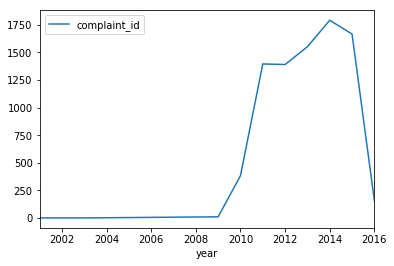

In [34]:
complaints_year.plot()

Brilliant. We made a chart.

HOLY JEEZ WE MADE A CHART.

As we might expect, a quick visualization gives us more questions to ask: 
- Why so few reports pre-2010?
- Are 2010 and 2016 really abberations, or is this partial data for some reason?

If you're doing this analysis at work, this is one place you're probably going to want to circle back to your data source or another expert to find out exactly how this was collected. (We're, um. We're not going to do that today.)

Instead, let's filter those older records so we can get a better picture of complaints since 2010 and throw a title on that chart. And we might very want to show someone else what we've discovered, so we'll export it to a file to make that easy.

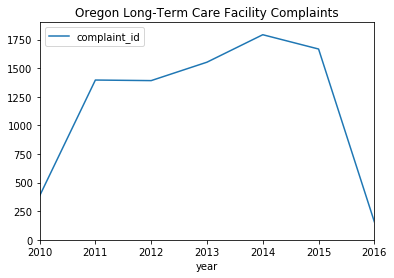

In [35]:
complaints_year = complaints_year[complaints_year.index > 2009]
complaints_year.plot(title="Oregon Long-Term Care Facility Complaints")
pylab.ylim([0,1900])

# and for good measure, let's save it to a file
plt.savefig("plot.png",format="png")
plt.savefig("plot.svg",format="svg")

Way better.

Now let's take a look visually at those complaint ratios.

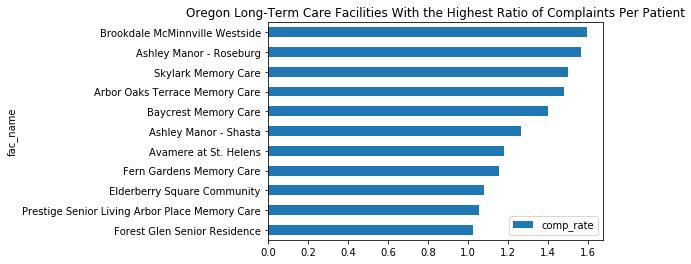

In [36]:
facility_ratio[facility_ratio["comp_rate"] > 1].plot.barh(title="Oregon Long-Term Care Facilities With the Highest Ratio of Complaints Per Patient").invert_yaxis()

These are not the prettiest charts ever -- and they don't have to be. They're another tool for quickly analyzing and understanding your data. And if you're working with a designer or want to plug your results into another visualization engine, this can help you decide the best tool to use or the best representation to make.

If you're looking to up your visualization game, check out Python libraries [Altair]('https://altair-viz.github.io/') and [seaborn]('https://seaborn.pydata.org/'), which will give you prettier static charts right out of the box, or [bokeh]('https://bokeh.pydata.org/en/latest/') for interactive graphics.